In [1]:
import requests

/Users/Hanxian_Lin/Documents/my-workspace/quantumblack/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
dt = '2019-10-10'
url = f"https://api.data.gov.sg/v1/environment/air-temperature?date={dt}"

/Users/Hanxian_Lin/Documents/my-workspace/quantumblack/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
resp = requests.get(url)

In [4]:
data = resp.json()

In [6]:
from typing import Dict
import pandas as pd

def choose_station(temp_data: Dict, station_id: str):
    output = []
    for item in data['items']:
        ts = item['timestamp']
        try:
            temperature = [temp['value'] for temp in item['readings'] if temp['station_id'] == station_id][0]
        except IndexError:
            pass
        output.append({
            'time': ts,
            'temp': temperature
        })
    return pd.DataFrame(output)

In [7]:
output

[{'time': '2019-10-10T00:01:00+08:00', 'temp': 26.8},
 {'time': '2019-10-10T00:02:00+08:00', 'temp': 26.8},
 {'time': '2019-10-10T00:03:00+08:00', 'temp': 26.8},
 {'time': '2019-10-10T00:04:00+08:00', 'temp': 26.8},
 {'time': '2019-10-10T00:05:00+08:00', 'temp': 26.8},
 {'time': '2019-10-10T00:06:00+08:00', 'temp': 26.8},
 {'time': '2019-10-10T00:07:00+08:00', 'temp': 26.8},
 {'time': '2019-10-10T00:08:00+08:00', 'temp': 26.8},
 {'time': '2019-10-10T00:09:00+08:00', 'temp': 26.8},
 {'time': '2019-10-10T00:10:00+08:00', 'temp': 26.7},
 {'time': '2019-10-10T00:11:00+08:00', 'temp': 26.7},
 {'time': '2019-10-10T00:12:00+08:00', 'temp': 26.7},
 {'time': '2019-10-10T00:13:00+08:00', 'temp': 26.7},
 {'time': '2019-10-10T00:14:00+08:00', 'temp': 26.7},
 {'time': '2019-10-10T00:15:00+08:00', 'temp': 26.7},
 {'time': '2019-10-10T00:16:00+08:00', 'temp': 26.7},
 {'time': '2019-10-10T00:17:00+08:00', 'temp': 26.7},
 {'time': '2019-10-10T00:18:00+08:00', 'temp': 26.7},
 {'time': '2019-10-10T00:19:

In [9]:
import pandas as pd

/Users/Hanxian_Lin/Documents/my-workspace/quantumblack/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='time'>

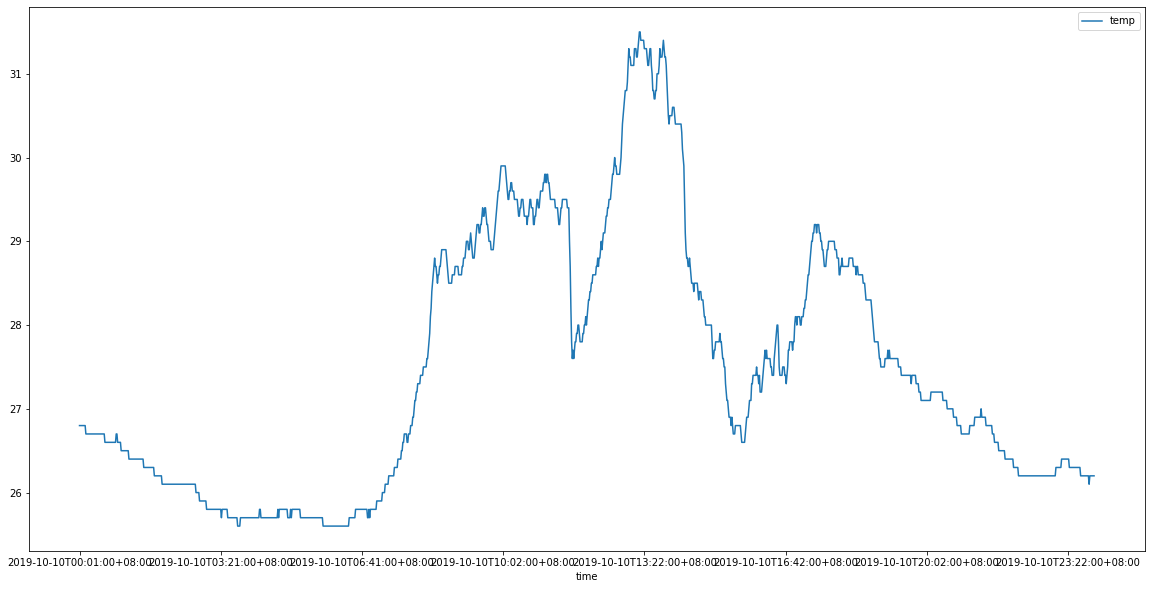

In [10]:
pd.DataFrame(output).plot(x="time", figsize=(20, 10))